<a href="https://colab.research.google.com/github/jeevisha19/DATA-SCIENCE/blob/main/House_Price_Prediction(Spatio_temporalFramework).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


=== Linear Regression ===
R² Score: 0.5766832020387221
RMSE: 0.7447940203094057

=== Random Forest ===
R² Score: 0.8068201053758808
RMSE: 0.5031348411023399

=== XGBoost ===
R² Score: 0.8295253594026681
RMSE: 0.47264309960173356


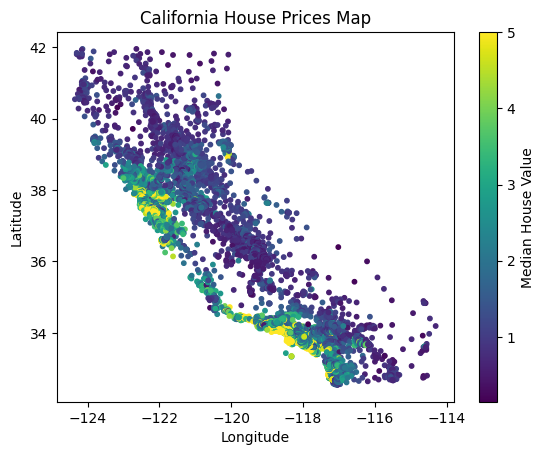

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- NEW: Import XGBoost ---
from xgboost import XGBRegressor

# 1. Load California housing data
housing = fetch_california_housing(as_frame=True)
data = housing.frame

# 2. Create a fake month column
np.random.seed(0)  # same random numbers every time
data["Month"] = np.random.randint(1, 13, size=len(data))

# 3. Create a season column
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

data["Season"] = data["Month"].apply(get_season)

# 4. Convert season to numeric code
season_map = {"Winter": 0, "Spring": 1, "Summer": 2, "Autumn": 3}
data["Season_Code"] = data["Season"].map(season_map)

# 5. Calculate a simple distance to Los Angeles
# (not exact haversine, but simple straight-line difference)
data["Dist_LA"] = np.sqrt(
    (data["Latitude"] - 34.0522) ** 2 +
    (data["Longitude"] - (-118.2437)) ** 2
)

# 6. Prepare data
X = data.drop(columns=["MedHouseVal", "Season"])
y = data["MedHouseVal"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- LINEAR REGRESSION ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\n=== Linear Regression ===")
print("R² Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

# --- RANDOM FOREST ---
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest ===")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# --- XGBOOST ---
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\n=== XGBoost ===")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

# --- PLOT HOUSE PRICES ON A MAP ---
plt.scatter(data["Longitude"], data["Latitude"],
            c=data["MedHouseVal"],
            cmap="viridis", s=10)
plt.colorbar(label="Median House Value")
plt.title("California House Prices Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
